<a href="https://colab.research.google.com/github/Abidah15/My_Notes-GColab/blob/main/2ndRegression_Project_CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Car Price


### 1- Business Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the car price.

Main Goal: Predict the car price based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the car price. So we are going to use Simple Linear Regression algorithm to solve the problem.

### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In this project we need to collect data about the engine-size, horsepower and the price.



### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.

### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [ ]:
link = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

import pandas as pd

dfB = pd.read_csv(link)

dfB.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#checking all the columns
pd.set_option('display.max_columns', None)
dfB.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
#checking the total of missing values
dfB.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [ ]:
import numpy as np

dfB['stroke'].replace(np.nan, dfB['stroke'].mean(), inplace=True)

dfB.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [ ]:
dfB['horsepower-binned'].value_counts().idxmax()

'Low'

In [ ]:
dfB['horsepower-binned'].replace(np.nan, dfB['horsepower-binned'].value_counts().idxmax, inplace=True)

dfB.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [ ]:
dfB.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201.000000,201.00000,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201.000000,201,201,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000
unique,NaN,NaN,22,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,6,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,NaN,NaN,toyota,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,32,165,115,94,118,198,NaN,NaN,NaN,NaN,NaN,145,157,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,53.766667,2555.666667,NaN,NaN,126.875622,NaN,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,2.447822,517.296727,NaN,NaN,41.546834,NaN,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,52.000000,2169.000000,NaN,NaN,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,55.500000,2926.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


In [ ]:
#finding the R(correlation) value for all numerical columns
dfB.numeric = dfB.select_dtypes(include=['number']) #select numerical features from the data

dfB.numeric.corr()

<ipython-input-9-0cd304806d75>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfB.numeric = dfB.select_dtypes(include=['number']) #select numerical features from the data


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.007992,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055127,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.157964,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123913,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188814,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060822,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167412,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205806,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.098282,-0.063388,-0.034079,-0.034741,0.082267,0.036285,0.241033,-0.241033


In [ ]:
dfBc = dfB[['curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'price' ]]

dfBc.corr()

,curb-weight,engine-size,horsepower,city-L/100km,price
curb-weight,1.000000,0.849072,0.757976,0.785353,0.834415
engine-size,0.849072,1.000000,0.822676,0.745059,0.872335
horsepower,0.757976,0.822676,1.000000,0.889488,0.809575
city-L/100km,0.785353,0.745059,0.889488,1.000000,0.789898
price,0.834415,0.872335,0.809575,0.789898,1.000000


<Axes: xlabel='horsepower', ylabel='price'>

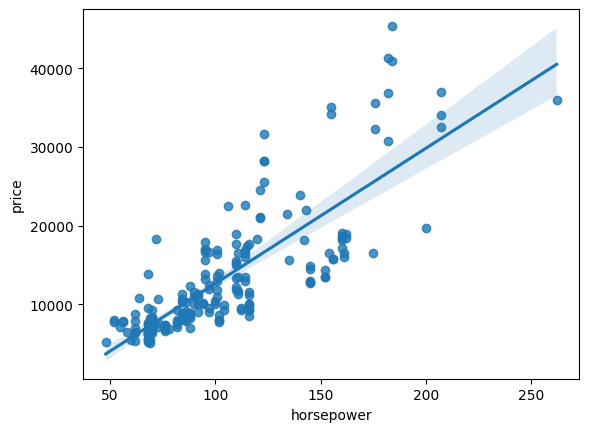

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x = 'horsepower', y = 'price', data=dfB)

<Axes: xlabel='curb-weight', ylabel='price'>

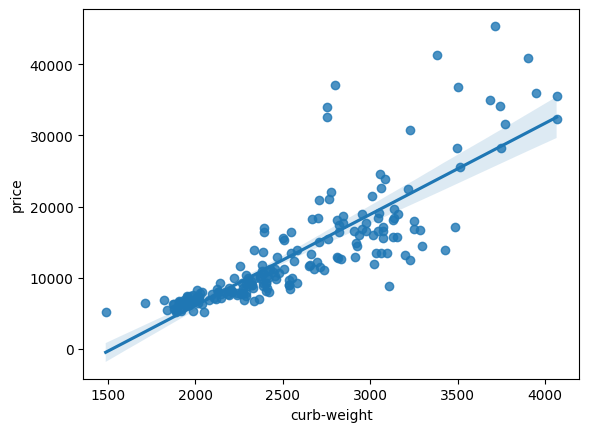

In [ ]:
sns.regplot(x = 'curb-weight', y = 'price', data=dfB)

<Axes: xlabel='city-L/100km', ylabel='price'>

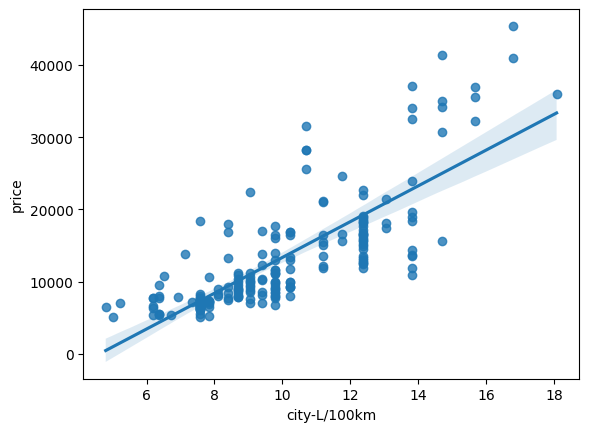

In [ ]:
sns.regplot(x = 'city-L/100km', y = 'price', data=dfB)

<Axes: xlabel='engine-size', ylabel='price'>

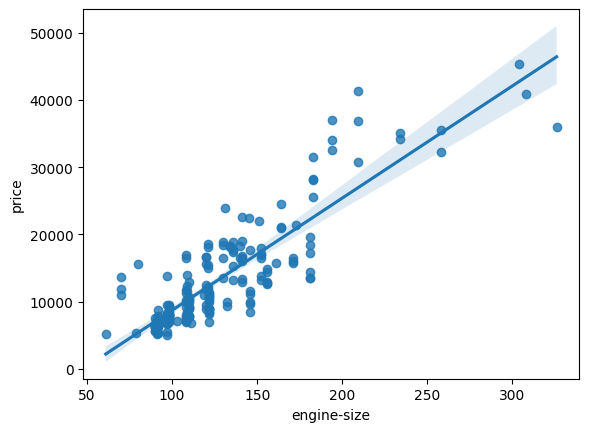

In [ ]:
sns.regplot(x = 'engine-size', y = 'price', data=dfB)

<Axes: xlabel='highway-mpg', ylabel='price'>

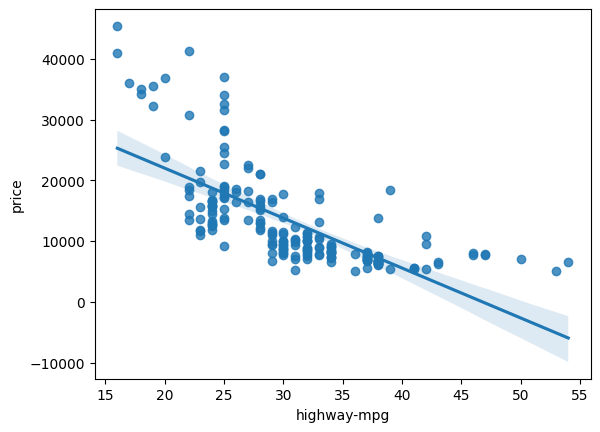

In [ ]:
sns.regplot(x = 'highway-mpg', y = 'price', data=dfB)

In [ ]:
import numpy as np

msk = np.random.rand(len(dfB)) <= 0.8
train = dfB[msk] #80% randomnly chosen from the data
test = dfB[~msk] #20% leftover of the data

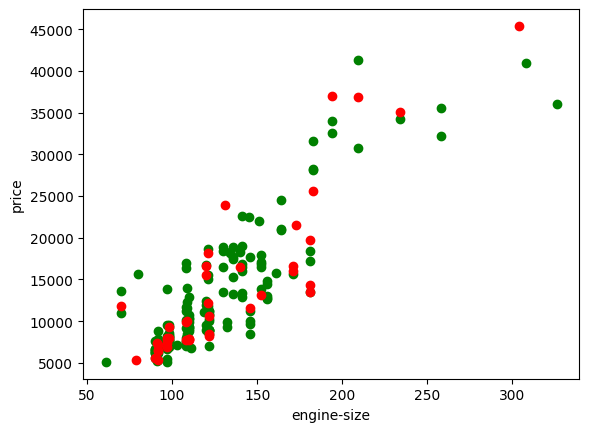

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(train['engine-size'], train['price'], color='green')
plt.scatter(test['engine-size'], test['price'], color='red')

plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

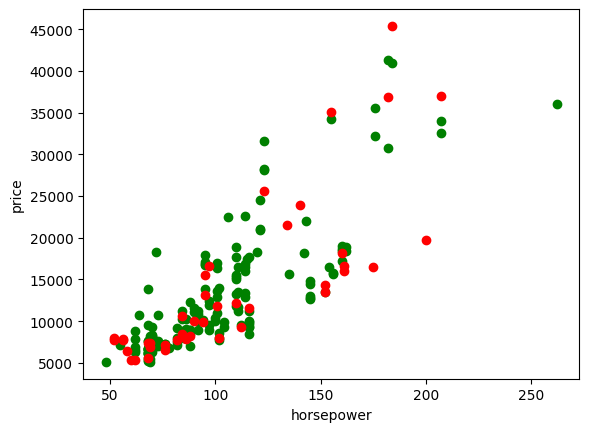

In [ ]:
plt.scatter(train.horsepower, train.price, color='green')
plt.scatter(test.horsepower, test.price, color='red')

plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

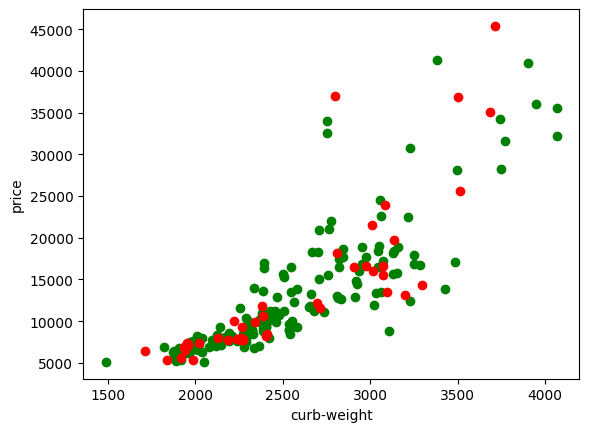

In [ ]:
plt.scatter(train['curb-weight'], train['price'], color='green')
plt.scatter(test['curb-weight'], test['price'], color='red')

plt.xlabel('curb-weight')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
#linearRegression is the algorithm from the sklearn

train_x = np.asanyarray(train[['horsepower']]) #under the variable of train_x
train_y = np.asanyarray(train[['price']])

#training
regr.fit(train_x, train_y)

LinearRegression()

In [ ]:
print ('The value of the slope is: ', regr.coef_)
print ('The value of the intercept is: ', regr.intercept_)

The value of the slope is:  [[171.87585478]]
The value of the intercept is:  [-4574.99330999]


Text(0, 0.5, 'Price')

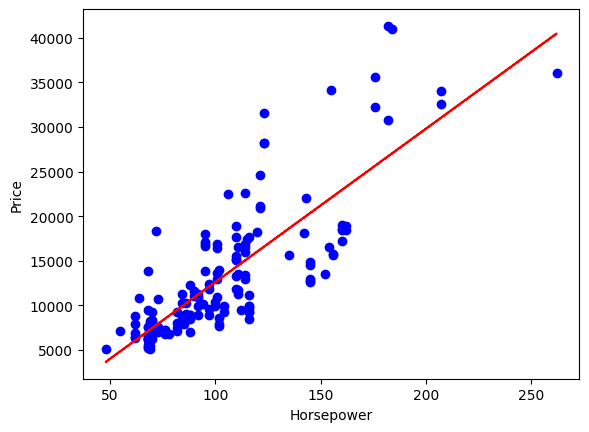

In [ ]:
#to see the best fitted line

plt.scatter(train['horsepower'], train['price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
#-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Horsepower")
plt.ylabel("Price")

In [ ]:
train_x = np.asanyarray(train[['engine-size']])
train_y = np.asanyarray(train[['price']])

#training
regr.fit(train_x, train_y)

LinearRegression()

Text(0, 0.5, 'Price')

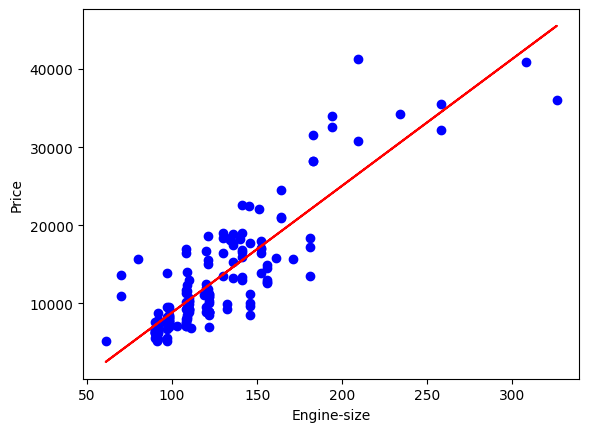

In [ ]:
#to see the best fitted line

plt.scatter(train['engine-size'], train['price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
#-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Engine-size")
plt.ylabel("Price")

In [ ]:
x = 75

y = regr.intercept_ + regr.coef_ *x

y

array([[4768.98489562]])

In [ ]:
x = int(dfB['engine-size'].sample()) #going to chose other random number

y = regr.intercept_ + regr.coef_ *x

y

<ipython-input-26-2af1c21f1c87>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x = int(dfB['engine-size'].sample()) #going to chose other random number


array([[10452.11871677]])

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['engine-size']])
test_y = np.asanyarray(test[['price']])

test_y_ = regr.predict(test_x) #prediction based on the engine-size

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2)) #to compare between test_y_ and test_y/;
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 is:  77.92
The MSE is:  19832072.673607595


**Trying to check the other correlated features**

In [ ]:
#check horsepower vs price using linear regression

regr2 = linear_model.LinearRegression() #linearRegression is the algorithm from the sklearn

train_x = np.asanyarray(train[['horsepower']]) #under the variable of train_x
train_y = np.asanyarray(train[['price']])

#training
regr2.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['price']])

test_y_ = regr2.predict(test_x) #prediction based on the engine-size

#evaluation

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', round(((np.mean((test_y_ - test_y)**2))*100),2))
print('The MAE is:', round(((np.mean(np.absolute(test_y_ - test_y)))*100),2))

The R2 is:  64.19
The MSE is:  3216940929.36
The MAE is: 417224.8


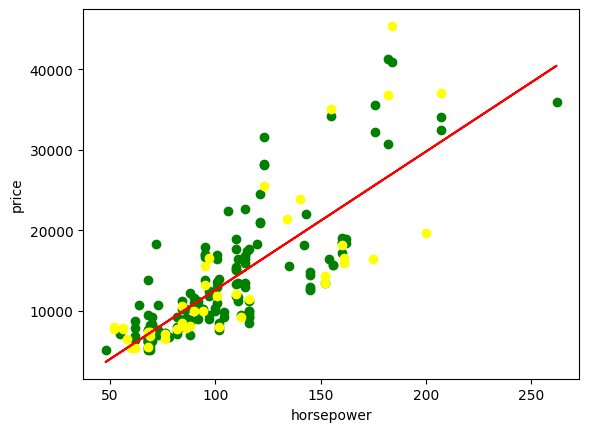

In [ ]:
plt.scatter(train.horsepower, train.price, color='green')
plt.scatter(test.horsepower, test.price, color='yellow')
plt.plot(train_x, regr2.coef_[0][0]*train_x + regr2.intercept_[0], '-r')

plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

In [ ]:
#Testing non-linear regression model to fuelconsumption

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['horsepower']])
train_y = np.asanyarray(train[['price']])

poly = PolynomialFeatures(degree=4) #default degree is 2, but the higher the degree, the more senstive it will be
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

#predicting

test_x = np.asanyarray(test[['horsepower']])
test_y = np.asanyarray(test[['price']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#evaluation

from sklearn.metrics import r2_score
print('The R2 Score is: ', r2_score(test_y, test_y_)*100)
print ('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2 Score is:  63.598831692347524
The MSE is: 32698355.4576693


Text(0, 0.5, 'Price')

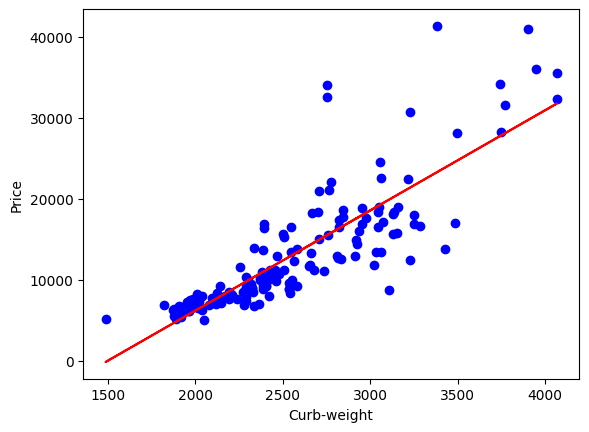

In [ ]:
#KIV

train_x = np.asanyarray(train[['curb-weight']])
train_y = np.asanyarray(train[['price']])

#training
regr.fit(train_x, train_y)

#to see the best fitted line
plt.scatter(train['curb-weight'], train['price'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
#-r is for the colour of the line, can be change to -g, you will see green
plt.xlabel("Curb-weight")
plt.ylabel("Price")

**Multiple Linear Regression**

In [ ]:
dfB.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [ ]:
#Modeling for curb-weight & city-L/100km with price
#try all codes in 1 (training, prediction & evaluation)

regr3 = linear_model.LinearRegression()

train_x = np.asanyarray(train[['curb-weight', 'city-L/100km']])
#under the variable of train_x
train_y = np.asanyarray(train[['price']])

#training
regr3.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['curb-weight', 'city-L/100km']])
test_y = np.asanyarray(test[['price']])

test_y_ = regr3.predict(test_x) #prediction based on curb-weight & city-L/100km

#evaluation

print ('The R2 is: ', round(((r2_score(test_y, test_y_))*100), 2))
#multiplies by 100 to get the percentage, rounded by 2
print ('The MSE is: ', round((((np.mean((test_y_ - test_y)**2)))*100),2))
print('The MAE is:', round(((np.mean(np.absolute(test_y_ - test_y)))*100),2))

The R2 is:  72.12
The MSE is:  2504029613.95
The MAE is: 325184.73


In [ ]:
#Modeling for ALL NUMERIC FEATURES with CO2EMISSIONS
#try all codes in 1 (training, prediction & evaluation)

from sklearn import linear_model

regr4 = linear_model.LinearRegression()

#Data is in Dataframe format but machine learning works with array, so changing it in array format and store it in new variable
train_x = np.asanyarray(train[['engine-size', 'horsepower', 'curb-weight', 'city-L/100km']])
train_y = np.asanyarray(train[['price']])

#training

regr4.fit(train_x, train_y)

#prediction

test_x = np.asanyarray(test[['engine-size', 'horsepower', 'curb-weight', 'city-L/100km']])
test_y = np.asanyarray(test[['price']])

test_y_ = regr4.predict(test_x)

#evaluation

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('The R2 is:', round(((r2_score(test_y, test_y_))*100),2))
print('The MSE is:', round(((np.mean((test_y - test_y_)**2)))*100,2))
print('The MAE is:', round(((np.mean(np.absolute(test_y - test_y_))))*100, 2))
print('The RMSE is:', np.sqrt(mean_squared_error(test_y, test_y_)))

The R2 is: 81.15
The MSE is: 1693587479.42
The MAE is: 278149.77
The RMSE is: 4115.321955107564
